## Importing and Initializing

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import os

In [103]:
data_dir = "data"   # Folder where images are stored
img_file = "data\subject01.sad"
processed_dir = "processed_data"

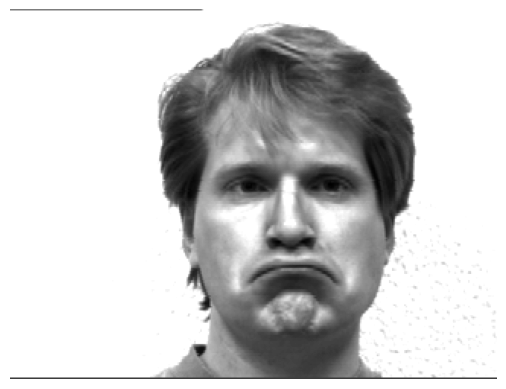

In [73]:
img = Image.open(img_file)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [74]:
type(img)

PIL.GifImagePlugin.GifImageFile

In [75]:
img_ndarray = np.asarray(img)
img_ndarray.shape

(243, 320)

In [80]:
(img_ndarray.min(),img_ndarray.max())

(9, 255)

## Data Visualization

In [40]:
def show_data(subject_id):
    emotions = ['centerlight', 'happy', 'leftlight', 'glasses', 'normal', 
                'rightlight', 'sad', 'sleepy', 'surprised', 'wink','noglasses']

    # Initialize list to store images.
    images = []
     # Load images for the specified subject
    for emotion in emotions:
        filename = f'subject{subject_id}.{emotion}'
        filepath = os.path.join(data_dir, filename)
        try:
            img = Image.open(filepath)  #Data type of img: PIL.GifImagePlugin.GifImageFile
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {filepath}")

    # Define the grid size for visualization
    grid_size = (3,4) 

    # Create a new figure
    plt.figure(figsize=(15,12))

    # Plot each image
    for i, img in enumerate(images):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(img, cmap='gray')  # Show image in grayscale
        plt.axis('off')
        plt.title(f'{emotions[i]}, fontsize=10) 

    # Adjust layout and show plot
    plt.tight_layout()
    plt.suptitle(f"Images of Subject {subject_id}", fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


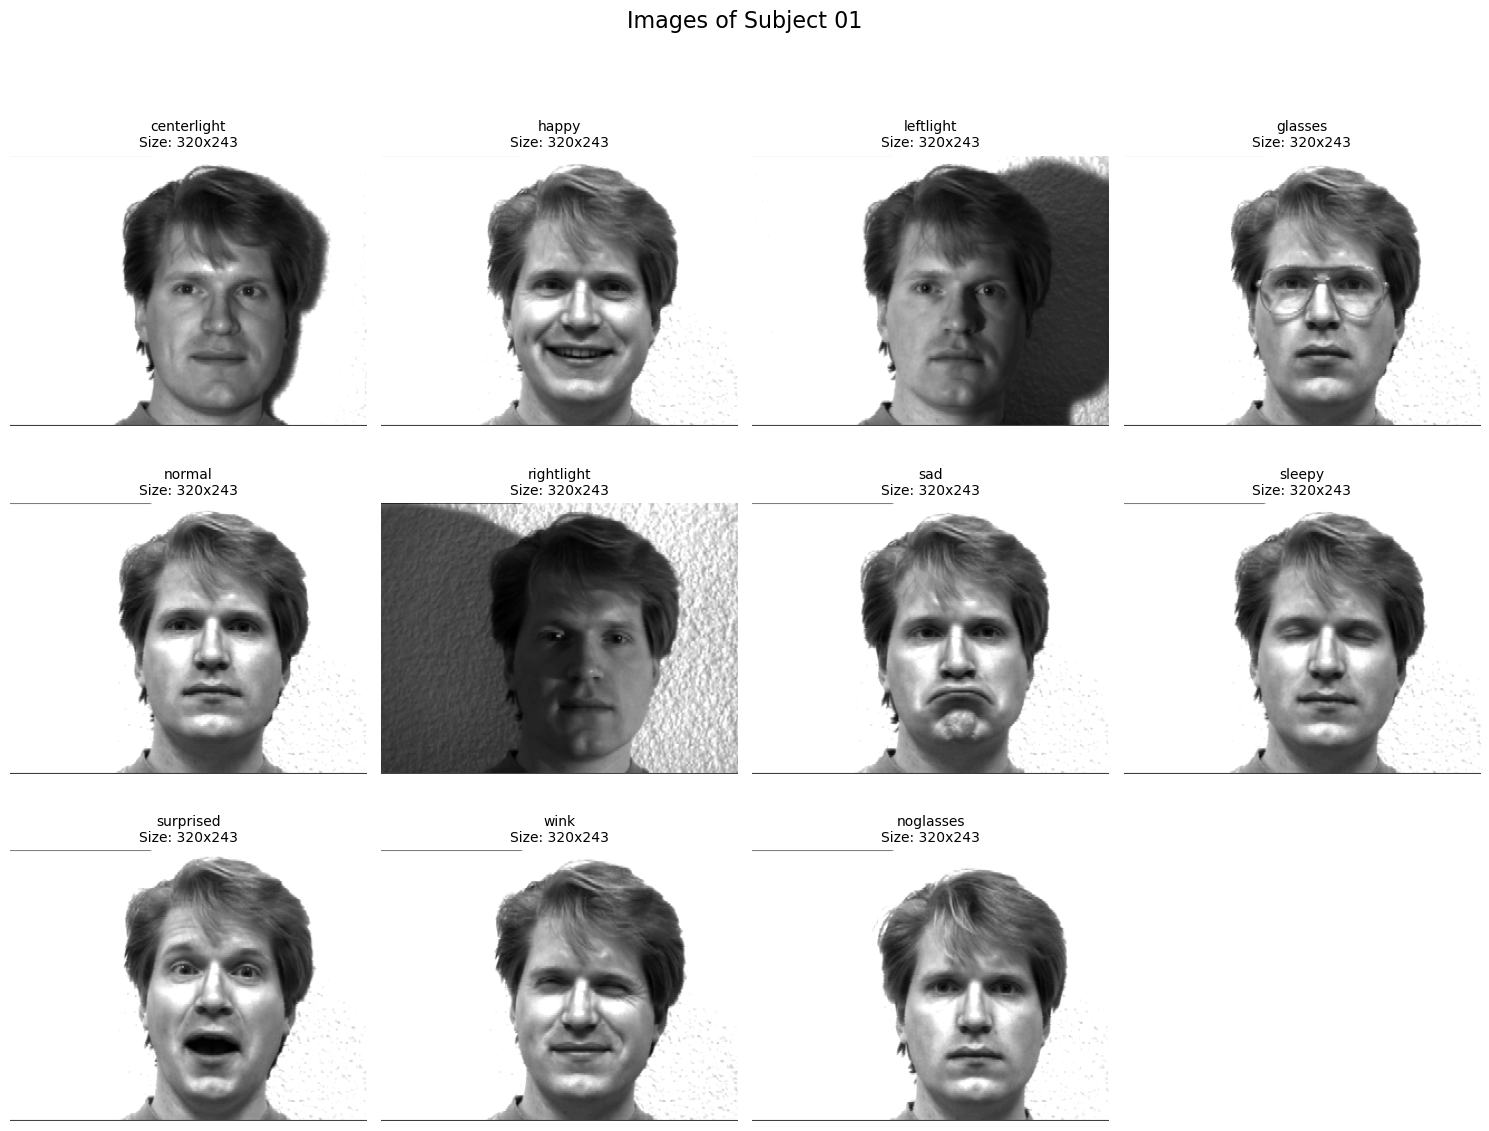

In [41]:
show_data(subject_id='01')

## Check if all the images are of same size

In [54]:
def isSameSize(directory):
  
    sizes = set()  # Use a set to store unique sizes

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                sizes.add(img.size)  # Add size (width, height) to the set
        except IOError:
            print(f"Cannot open file: {filepath}")

    if len(sizes) == 1:  #since sizes is a set, it will not store duplicates.
        # All images have the same size
        size = sizes.pop()  # Get the unique size
        print(f"All the images are of size. \nThe size is {size}")
    else:
        # Images have different sizes
        return False, None



In [55]:
isSameSize(data_dir)

All the images are of size. 
 The size is (320, 243)


## Normalization

Normalization helps improve the performance and convergence speed of machine learning algorithms.
Normalizing the pixel values to [0,1]

In [92]:
def normalize_image(directory):
    output_directory = "processed_data"
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                img_ndarray = np.asarray(img, dtype=np.float32)
                img_ndarray = img_ndarray.copy() 
                img_ndarray /= 255.0

            output_filepath = os.path.join(output_directory, f"{filename}.npy")
            np.save(output_filepath, img_ndarray)
                
        except IOError:
            print(f"Cannot open file: {filepath}")

    
    return True

This function normalizes the image and stores in the folder named processed_data

In [93]:
normalize_image(data_dir)

True

In [101]:
def processed_img(subject_id, expression, directory):
    target_filename = f"subject{subject_id}.{expression}.npy"
    
    for filename in os.listdir(directory):
        if filename == target_filename: 
            filepath = os.path.join(directory, filename)
            try:
                # Load the numpy array
                img_ndarray = np.load(filepath)
                return img_ndarray  # Return the loaded array once found
                
            except IOError:
                print(f"Cannot open file: {filepath}")
    
    print(f"File {target_filename} not found in directory.")
    return None  # Return None if no matching file is found

    

In [106]:
img_ndarray = processed_img("02", "happy", processed_dir)

In [111]:
(img_ndarray.min(),img_ndarray.max())

(0.0, 1.0)

## Next step